<h1> Using Scikit learn

In [92]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import add_dummy_feature
import numpy as np
iris=load_iris(as_frame=True)
X=iris.data
Y=iris.target_names[iris.target]

In [93]:
from sklearn.preprocessing import add_dummy_feature
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=add_dummy_feature(X)
scaler=StandardScaler()
trainx,testx,trainy,testy= train_test_split(X,Y,test_size=0.5)
validx=testx[:len(testx)//2]
validy=testy[:len(testy)//2]
testx=testx[len(testx)//2:]
testy=testy[len(testy)//2:]

In [94]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
validy_encoded=ohe.fit_transform(validy.reshape(-1,1),)
trainy_encoded=ohe.fit_transform(trainy.reshape(-1,1),)
testy_encoded=ohe.fit_transform(testy.reshape(-1,1),)

In [95]:
ohe.categories_

[array(['setosa', 'versicolor', 'virginica'], dtype='<U10')]

In [96]:
def softmaxpred(theta,x):
    score=x@theta 
    predicts=[]
    for i in range(len(score)):
        if np.argmax(score[i])==0:
            predicts.append('setosa')
        if np.argmax(score[i])==1:
            predicts.append('versicolor')
        if np.argmax(score[i])==2:
            predicts.append('virginica')
    return np.array(predicts)


In [97]:
def gradientvector(probability,predicts,x):
    gradient=x.T@(probability-predicts)
    return gradient

In [98]:
theta=np.random.randn(5,3) #(5,3)= (no of features +1(for intercept), no of outputs)
predicts=softmaxpred(theta=theta,x=trainx)

In [99]:
def softmaxproba(logit):
    exponentials=np.exp(logit)
    return exponentials/np.sum(exponentials,axis=1,keepdims=True)

In [100]:
from sklearn.metrics import accuracy_score
best_score=0
scores=[]
gradients=[]
theta_paths=[]
n_epochs=5000
best_epoch=0
for epoch in range(n_epochs):
    validy_pred=softmaxpred(theta=theta,x=validx)
    score= accuracy_score(validy,validy_pred)
    scores.append(score)
    if (score>best_score):
        best_score=score
        best_theta= theta
        best_epoch=epoch
    graident=(trainx.T@(softmaxproba(trainx@theta)-trainy_encoded))/len(trainx)
    gradients.append(graident)
    theta=theta-0.01*graident
    theta_paths.append(theta)
    
    

In [101]:
testx

array([[1. , 6.7, 3.1, 5.6, 2.4],
       [1. , 5.4, 3.4, 1.7, 0.2],
       [1. , 7.7, 3.8, 6.7, 2.2],
       [1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 6.5, 2.8, 4.6, 1.5],
       [1. , 6.3, 2.3, 4.4, 1.3],
       [1. , 5.1, 2.5, 3. , 1.1],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 6.3, 2.5, 4.9, 1.5],
       [1. , 7.2, 3.6, 6.1, 2.5],
       [1. , 5.1, 3.5, 1.4, 0.3],
       [1. , 4.9, 3.6, 1.4, 0.1],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 6.7, 3.3, 5.7, 2.5],
       [1. , 6. , 2.2, 4. , 1. ],
       [1. , 6.3, 3.4, 5.6, 2.4],
       [1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.6, 3.2, 1.4, 0.2],
       [1. , 5.5, 2.4, 3.8, 1.1],
       [1. , 4.7, 3.2, 1.6, 0.2],
       [1. , 6.5, 3. , 5.5, 1.8],
       [1. , 7.9, 3.8, 6.4, 2. ],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 6. , 2.9, 4.5, 1.5],
       [1. , 5.9, 3.2, 4.8, 1.8],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 5

In [102]:
theta_paths

[array([[ 0.37531765,  0.99486655,  1.90782953],
        [ 0.11760462, -1.00861952,  1.03414611],
        [ 0.68497512, -1.20346221, -0.63159889],
        [ 0.3252434 , -0.04524413, -0.65654048],
        [-1.02755211, -0.50528924, -0.33302497]]),
 array([[ 0.37381161,  0.99859985,  1.90560227],
        [ 0.10618726, -0.98668636,  1.0236303 ],
        [ 0.68183331, -1.19327563, -0.63864366],
        [ 0.31125013, -0.0293909 , -0.65840045],
        [-1.0328419 , -0.5003826 , -0.33264183]]),
 array([[ 0.37240994,  1.00233314,  1.90327065],
        [ 0.09541443, -0.96475325,  1.01247002],
        [ 0.67899381, -1.18308908, -0.64599071],
        [ 0.29774304, -0.01353771, -0.66074654],
        [-1.03796446, -0.49547598, -0.33242588]]),
 array([[ 0.37108069,  1.00606642,  1.90086663],
        [ 0.08509614, -0.94282023,  1.00085529],
        [ 0.67636032, -1.17290258, -0.65354371],
        [ 0.28459531,  0.00231543, -0.66345195],
        [-1.04296168, -0.49056938, -0.33233526]]),
 array([[ 0.

In [103]:
theta_paths[-1]

array([[ 0.56446662,  1.71623445,  0.99731266],
       [ 0.31708809,  0.62054828, -0.79450517],
       [ 1.83087652, -0.84966093, -2.13130156],
       [-1.89334604,  0.03037887,  1.48642596],
       [-1.96701779, -1.74799157,  1.84914304]])

In [104]:
best_epoch

1526

In [105]:
theta_paths[0], best_theta

(array([[ 0.37531765,  0.99486655,  1.90782953],
        [ 0.11760462, -1.00861952,  1.03414611],
        [ 0.68497512, -1.20346221, -0.63159889],
        [ 0.3252434 , -0.04524413, -0.65654048],
        [-1.02755211, -0.50528924, -0.33302497]]),
 array([[ 0.45361831,  1.39603101,  1.42836441],
        [ 0.03689448,  0.28140746, -0.17517074],
        [ 1.25528227, -0.78593475, -1.61943349],
        [-1.11962825,  0.16530744,  0.5777796 ],
        [-1.62766985, -1.05128364,  0.81308716]]))

In [106]:
accuracy_score(testy,softmaxpred(theta_paths[best_epoch],testx))


0.9473684210526315

Text(1526.05, 0.8959459459459459, 'best_score')

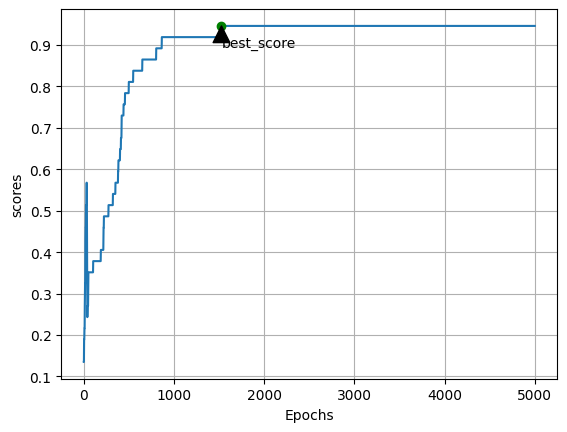

In [107]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.plot(best_epoch,best_score,marker='o',color="green")
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("scores")
plt.annotate("best_score",xy=(best_epoch,best_score),xytext=(best_epoch+0.05,best_score-0.05),arrowprops=dict(facecolor="black",width=0.2))

Introducing cross entropy cost function as score and replacing variable name score with error

In [108]:
(np.log(softmaxproba(validx@theta))).shape

(37, 3)

In [109]:
len(validx)

37

In [110]:
(-validy_encoded.T@np.log(softmaxproba(validx@theta))/len(validx))<best_score

array([[ True,  True, False],
       [False,  True,  True],
       [False,  True,  True]])

In [111]:
from sklearn.metrics import accuracy_score
theta=np.random.randn(5,3)

best_error=np.array([[np.inf , np.inf,np.inf],
       [np.inf, np.inf, np.inf],
       [np.inf, np.inf, np.inf]])
errors=[]
gradients=[]
theta_paths=[]
n_epochs=5000
best_epoch=0
for epoch in range(n_epochs):
    validy_pred=softmaxpred(theta=theta,x=validx)
    error= -validy_encoded.T@np.log(softmaxproba(validx@theta))/len(validx)
    errors.append(error)
    if ((error<best_score).any()):
        best_error=error
        best_theta= theta
        best_epoch=epoch
    graident=(trainx.T@(softmaxproba(trainx@theta)-trainy_encoded))/len(trainx)
    gradients.append(graident)
    theta=theta-0.01*graident
    theta_paths.append(theta)

In [112]:
best_theta

array([[ 1.90744336, -0.12773444,  0.06713126],
       [ 0.46115823,  0.80787963, -1.05664242],
       [ 1.24024964, -0.55123833, -1.72358842],
       [-1.19679123,  0.53073057,  2.52798952],
       [-1.5598333 , -0.32506563,  2.63295918]])

In [113]:
accuracy_score(testy,softmaxpred(best_theta,testx))

0.9473684210526315